### Project Title

## Stock Price Prediction using Linear Regression — Apple Inc. (AAPL)

#### Domain:Machine Learning

#### Problem Statement: To develop a machine learning model that predicts future Apple stock closing prices using historical stock market data

#### Outcome: The model predicts future stock closing prices based on historical trends

#### To handle data, visualization, preprocessing, and ML models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#### 2.To load the data 

In [3]:
df = pd.read_csv("Apple_historical_data.csv")   # replace with your dataset path


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker', 'name'], dtype='object')

## 3.Understand the Data

#### Understand data structure before processing



In [5]:
df.head()
df.tail()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11349 entries, 0 to 11348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11349 non-null  object 
 1   Open    11349 non-null  float64
 2   High    11349 non-null  float64
 3   Low     11349 non-null  float64
 4   Close   11349 non-null  float64
 5   Volume  11349 non-null  int64  
 6   ticker  11349 non-null  object 
 7   name    11349 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 709.4+ KB


,Open,High,Low,Close,Volume
count,11349.000000,11349.000000,11349.000000,11349.000000,1.134900e+04
mean,27.813152,28.115122,27.529990,27.835583,3.098809e+08
std,57.505004,58.124609,56.938723,57.561123,3.334301e+08
min,0.038072,0.038072,0.037645,0.037645,0.000000e+00
25%,0.245770,0.252168,0.240268,0.245552,1.064056e+08
50%,0.477907,0.488625,0.467980,0.480091,1.989904e+08
75%,21.419550,21.673919,21.212119,21.464226,3.902584e+08
max,286.200012,288.619995,283.299988,286.190002,7.421641e+09


## 4.Check & Remove Null Values

#### ML models cannot work with missing values.

In [6]:
df.isnull().sum()



Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
ticker    0
name      0
dtype: int64

## check Duplicate Rows

#### Duplicate data can bias the model.

In [7]:
df.duplicated().sum()


np.int64(0)

## Convert Date Column

#### Date is not directly usable in ML
#### ML algorithms work with numbers, not dates


 

In [8]:
# Check columns
print(df.columns)

# Target
y = df['Close']

# Features
X = df.drop(columns=['Close'])

print("X columns:", X.columns)
print("y column:", y.name)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker', 'name'], dtype='object')
X columns: Index(['Date', 'Open', 'High', 'Low', 'Volume', 'ticker', 'name'], dtype='object')
y column: Close


In [9]:
print(df['Date'].dtype)

object


In [10]:
df['Date'].head(10)

0    1980-12-12 00:00:00-05:00
1    1980-12-15 00:00:00-05:00
2    1980-12-16 00:00:00-05:00
3    1980-12-17 00:00:00-05:00
4    1980-12-18 00:00:00-05:00
5    1980-12-19 00:00:00-05:00
6    1980-12-22 00:00:00-05:00
7    1980-12-23 00:00:00-05:00
8    1980-12-24 00:00:00-05:00
9    1980-12-26 00:00:00-05:00
Name: Date, dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)


In [12]:
df['Date'] = df['Date'].dt.tz_convert(None)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])


In [14]:
print(df['Date'].dtype)


datetime64[ns]


#### 5.feature transformation

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [16]:
df['Month_Name'] = df['Date'].dt.month_name()

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Month_Name_Encoded'] = le.fit_transform(df['Month_Name'])
# Drop unused columns
df = df.drop(columns=['Date', 'Month_Name'])



## 6.Feature Selection
#### Independent (X) and Dependent (Y)
#### ML needs input and output variables.

In [17]:
# Independent variables
X = df[['Open', 'High', 'Low', 'Volume']]

# Dependent variable
y = df['Close']

print("Independent Variables:", X.columns.tolist())
print("Dependent Variable: Close")


Independent Variables: ['Open', 'High', 'Low', 'Volume']
Dependent Variable: Close


In [18]:
print(X.columns)


Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


## 7.Feature Scaling

#### To bring all features to the same scale

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 8.Train-Test Split
#### To test model performance on unseen data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


####  9.model selection

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


#### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LR_Accuracy = round(r2_score(y_test, model.predict(X_test)) * 100)
LR_Accuracy


100

#### Decision Tree Regression

In [23]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

100

#### Support Vector Regression

In [24]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

99

#### Random Forest Regression

In [25]:
## random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

100

#### Polynomial Regression

In [26]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

100

## Accuracy Comparison Visualization

 #### To identify the best model visually

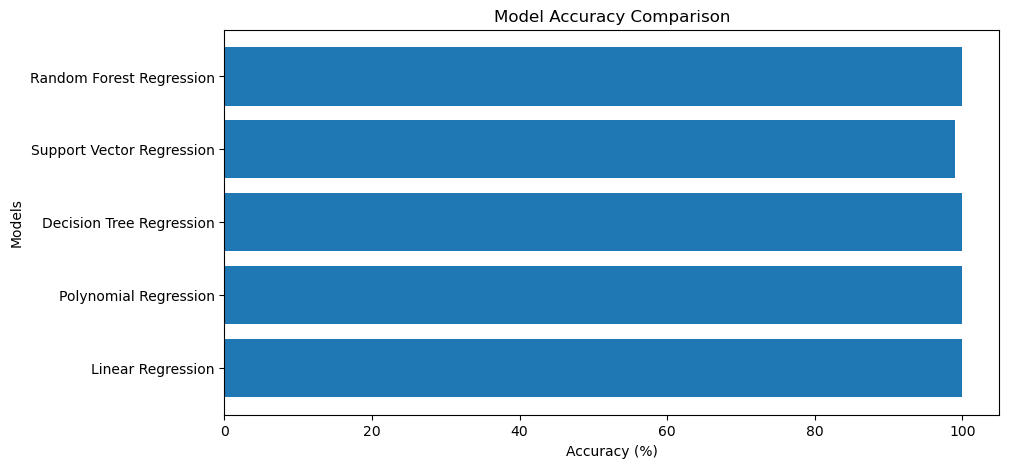

In [27]:
models = [
    "Linear Regression",
    "Polynomial Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Random Forest Regression"
]

Accuracy = [
    LR_Accuracy,
    PR_Accuracy,
    DTR_Accuracy,
    SVR_Accuracy,
    RFR_Accuracy
]

plt.figure(figsize=(10,5))
plt.barh(models, Accuracy)
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Accuracy Comparison")
plt.show()


## Best Model Selection

#### Choose the model with highest accuracy

#### Usually Random Forest Regression performs best
#### Typically highest accuracy for stock prediction



In [28]:
final_model = RF_model


In [29]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)


,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = final_model.predict(X_test)


## 10. Compare Actual vs Predicted Values

#### To visually show model performance

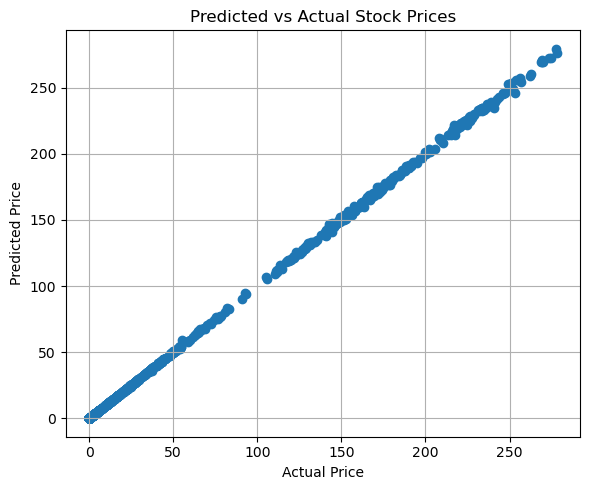

In [39]:
plt.figure(figsize=(6,5))
plt.scatter(y_test.values, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Stock Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


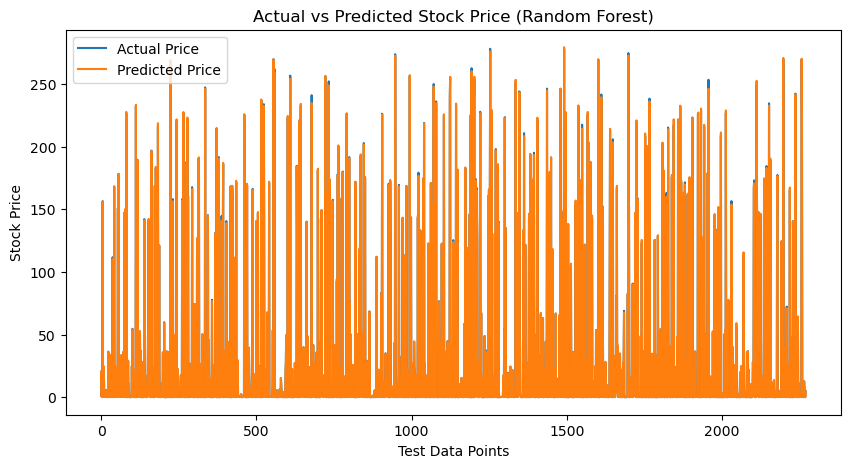

In [31]:

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Price (Random Forest)")
plt.legend()
plt.show()


#### predict the user input with the random forest model 

In [32]:
import numpy as np

user_input = [180.5, 182.3, 179.8, 45000000]   # Open, High, Low, Volume

user_input = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input)
prediction = RF_model.predict(user_input_scaled)

print("Predicted Apple Stock Close Price:", prediction[0])


Predicted Apple Stock Close Price: 181.54477233886718


c:\Users\PURNADOKALA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Save Model & Scaler

#### For reuse and deployment

In [33]:
import joblib

joblib.dump(final_model, "random_forest_apple_model.pkl")

['random_forest_apple_model.pkl']

In [34]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']